In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Problem1

In [2]:
data1 = pd.read_csv('PLACES__Local_Data_for_Better_Health__County_Data_2023_release_20240417.csv')
data1.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2021,AR,Arkansas,Conway,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,33.9,...,NaN,29.1,38.8,20873,5029,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-92.6892479 35.265702)
1,2020,AZ,Arizona,Maricopa,BRFSS,Prevention,Mammography use among women aged 50-74 years,%,Crude prevalence,69.0,...,NaN,65.5,72.3,4496588,4013,PREVENT,MAMMOUSE,CrdPrv,Mammography,POINT (-112.4989296 33.3451756)
2,2021,AR,Arkansas,Jackson,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,40.1,...,NaN,32.5,47.8,16811,5067,HLTHOUT,OBESITY,CrdPrv,Obesity,POINT (-91.2232051 35.5964674)
3,2020,CA,California,Alameda,BRFSS,Health Outcomes,All teeth lost among adults aged >=65 years,%,Crude prevalence,6.7,...,NaN,4.8,9.2,1648556,6001,HLTHOUT,TEETHLOST,CrdPrv,All Teeth Lost,POINT (-121.912488 37.6471385)
4,2021,AR,Arkansas,Ashley,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Crude prevalence,25.4,...,NaN,21.3,30.0,18674,5003,HLTHOUT,DEPRESSION,CrdPrv,Depression,POINT (-91.7722672 33.1908354)


In [3]:
data1.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation'],
      dtype='object')

In [4]:
aap = data1[(data1['Data_Value_Type']=='Age-adjusted prevalence')&(data1['MeasureId']=='OBESITY')]
X = np.log(aap['TotalPopulation'].values.reshape(-1, 1))
y = np.log(aap['Data_Value'].values)

In [5]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

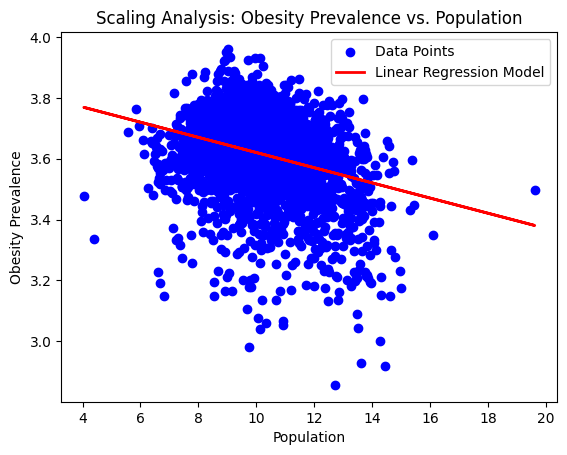

In [6]:
plt.scatter(X, y, color='blue', label='Data Points')

plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Linear Regression Model')

plt.title('Scaling Analysis: Obesity Prevalence vs. Population')
plt.xlabel('Population')
plt.ylabel('Obesity Prevalence')

plt.legend()

plt.show()

In [7]:
y_pred = regressor.predict(X)
r_squared = r2_score(y, y_pred)

In [8]:
print("Scaling Law Equation(with log): log(Obesity_Prevalence) = {}+ {} * Population".format(regressor.intercept_ , regressor.coef_[0]))
print("Scaling Law Equation: Obesity_Prevalence = {} * Population^{}".format(np.e**regressor.intercept_ , regressor.coef_[0]))
print("R^2 Value:", r_squared)

Scaling Law Equation(with log): log(Obesity_Prevalence) = 3.869516693443047+ -0.02492204271590146 * Population
Scaling Law Equation: Obesity_Prevalence = 47.919220809685044 * Population^-0.02492204271590146
R^2 Value: 0.08400818414751543


The analysis result doesn't match my expectations.

In the case of obesity prevalence, a β < 0 could indicate that as the urban population grows, the obesity prevalence decreases and shows negative growth. In my mind, as the population of an area increases, the rate of increase in obesity prvalence slows down but still increase in general. Because big cities have access to more high-calorie fast food and a higher proportion of the population eats fast food. At the same time, work and life in big cities are more likely to lack exercise, so the obesity rate will increase with the size of the city. But people in big cities also have better sports and health and related facilities, and most people pay more attention to body management. So my guess is that the result is sub-linear. This could be due to the greater influence of factors such as better access to healthcare, increased awareness about healthy lifestyle choices, or the presence of more recreational facilities in larger urban areas.

In [9]:
aap['residual'] = y - y_pred
aap['SAMI'] = np.exp(aap['residual'])

C:\Users\14367\AppData\Local\Temp\ipykernel_24080\2086108426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aap['residual'] = y - y_pred
C:\Users\14367\AppData\Local\Temp\ipykernel_24080\2086108426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aap['SAMI'] = np.exp(aap['residual'])


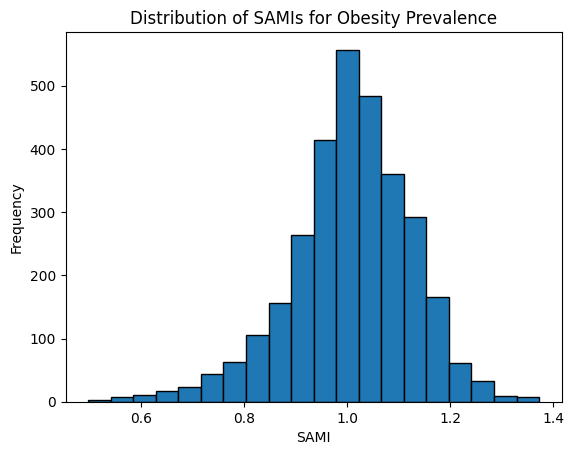

In [10]:
plt.hist(aap['SAMI'],bins=20,edgecolor='black')
plt.xlabel("SAMI")
plt.ylabel("Frequency")
plt.title("Distribution of SAMIs for Obesity Prevalence")
plt.show()

In [11]:
smallest_sami_county = aap['LocationName'][aap.SAMI.idxmin()]
largest_sami_county = aap['LocationName'][aap.SAMI.idxmax()]

print("County with Smallest SAMI:", smallest_sami_county)
print("County with Largest SAMI:", largest_sami_county)

County with Smallest SAMI: Boulder
County with Largest SAMI: Perry


County with Smallest SAMI: Boulder.

Boulder County is a county located in the U.S. state of Colorado of the United States. As of the 2020 census, the population was 330,758. The most populous municipality in the county and the county seat is Boulder. Boulder County comprises the Boulder, Colorado Metropolitan Statistical Area, which is included in the Denver–Aurora, Colorado Combined Statistical Area.

County with Largest SAMI: Perry
    
Perry County is a county in the Commonwealth of Pennsylvania. As of the 2020 census, the population was 45,842. The county seat is New Bloomfield.

### Problem 2

In [12]:
aap2 = data1[(data1['Data_Value_Type']=='Age-adjusted prevalence')&(data1['MeasureId']=='DIABETES')]
X = np.log(aap2['TotalPopulation'].values.reshape(-1, 1))
y = np.log(aap2['Data_Value'].values)

In [13]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

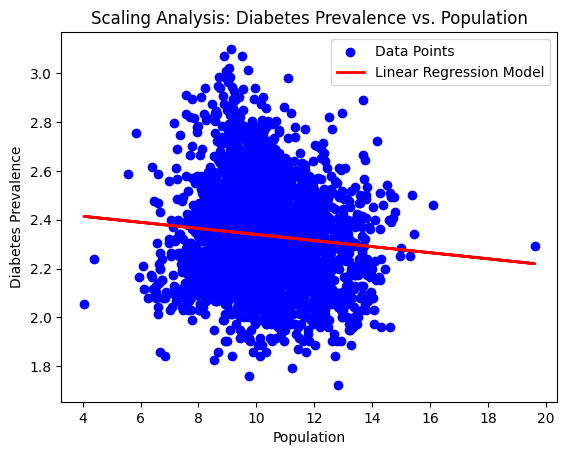

In [14]:
plt.scatter(X, y, color='blue', label='Data Points')

plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Linear Regression Model')

plt.title('Scaling Analysis: Diabetes Prevalence vs. Population')
plt.xlabel('Population')
plt.ylabel('Diabetes Prevalence')

plt.legend()

plt.show()

In [15]:
y_pred = regressor.predict(X)
r_squared = r2_score(y, y_pred)

In [16]:
print(f'Equation of scaling law( with log): log(Diabetes_Prevalence) = {regressor.intercept_} + {regressor.coef_[0]}*log(Population)')
print("Scaling Law Equation: Diabetes_Prevalence = {}*Population^{}".format(np.e**regressor.intercept_ , regressor.coef_[0]))
print("R^2 Value:", r_squared)

Equation of scaling law( with log): log(Diabetes_Prevalence) = 2.463976316378402 + -0.012450545727809348*log(Population)
Scaling Law Equation: Diabetes_Prevalence = 11.75144622950784*Population^-0.012450545727809348
R^2 Value: 0.008519472886346802


The analysis result matches my expectations.

In the case of diabetes prevalence, a β < 0 ,like the β in the obesity scaling, could indicate that as the urban population grows, the diabetes prevalence decreases and shows negative growth. In my mind, obesity and diabetes are closely related. And as the population of an area increases, the rate of increase in diabetes prvalence decrease because bigger cities have access to better healthcare and related facilities, and increased awareness about healthy lifestyle choices.

In [17]:
aap2['residual'] = y - y_pred
aap2['SAMI'] = np.exp(aap2['residual'])

C:\Users\14367\AppData\Local\Temp\ipykernel_24080\801051731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aap2['residual'] = y - y_pred
C:\Users\14367\AppData\Local\Temp\ipykernel_24080\801051731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aap2['SAMI'] = np.exp(aap2['residual'])


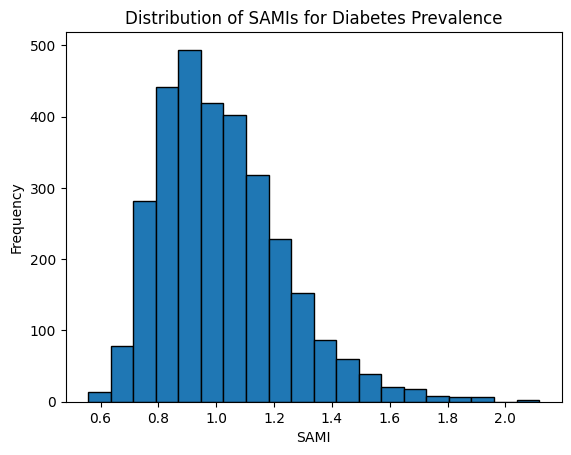

In [18]:
plt.hist(aap2['SAMI'],bins=20,edgecolor='black')
plt.xlabel("SAMI")
plt.ylabel("Frequency")
plt.title("Distribution of SAMIs for Diabetes Prevalence")
plt.show()

In [19]:
correlation_coefficient = np.corrcoef(aap.SAMI, aap2.SAMI)[0, 1]

In [20]:
print("the R2 for the correlation between two SAMIs:", correlation_coefficient**2)

the R2 for the correlation between two SAMIs: 0.00021453745640162493


The correlation R2 of 0.00021453745640162493 indicate the variability in two variables' residuals is very low. It can be explained that the prevalences of obesity and diabetes don't have a strong correlation 

Obesity and diabetes are not very related, and there may be some other factors cause that. Here are some examples:

1. Genetics: Genetics may play a role in the relationship between the two. Certain genes may increase a person's risk of obesity or diabetes, and these genes may affect the incidence of obesity and diabetes independently of each other, resulting in a seemingly unrelated relationship.

2. Lifestyle factors: While there may be a link between obesity and diabetes, lifestyle factors (such as eating habits, exercise levels, etc.) may also play an important role between the two. For example, even if a person is not overweight or obese, he or she may still develop diabetes if they eat an unhealthy diet or lack exercise.

3. Metabolic syndrome: Metabolic syndrome is a group of symptoms closely associated with obesity, including high blood pressure, high blood sugar, and high cholesterol levels. Although diabetes and obesity are closely related, not all obese people develop diabetes. The occurrence of metabolic syndrome may be one of the factors influencing the association between obesity and diabetes.

4. Other health factors: Other health factors, such as cardiovascular disease, thyroid problems, medication use, etc., may also influence the association between obesity and diabetes. Certain diseases or medications may increase your risk of diabetes regardless of weight.

### Problem 3

In [21]:
delta_t = 0.01
alpha = 0.5
sigma = 2
num_steps = 50
num_realizations = 500

In [22]:
means_ = np.zeros(num_steps)
std_devs_ = np.zeros(num_steps)

In [23]:
for r in range(num_realizations):
    x = np.zeros(num_steps)
    x[0] = 1  

    for t in range(1,50):
        epsilon = np.random.normal(0, 1)
        x[t] = alpha * x[t-1] + sigma * epsilon

    means_ += x
    std_devs_ += x ** 2

In [24]:
means = means_ / num_realizations
std_devs = np.sqrt(std_devs_ / num_realizations - means ** 2)

In [25]:
time = np.arange(num_steps) * delta_t

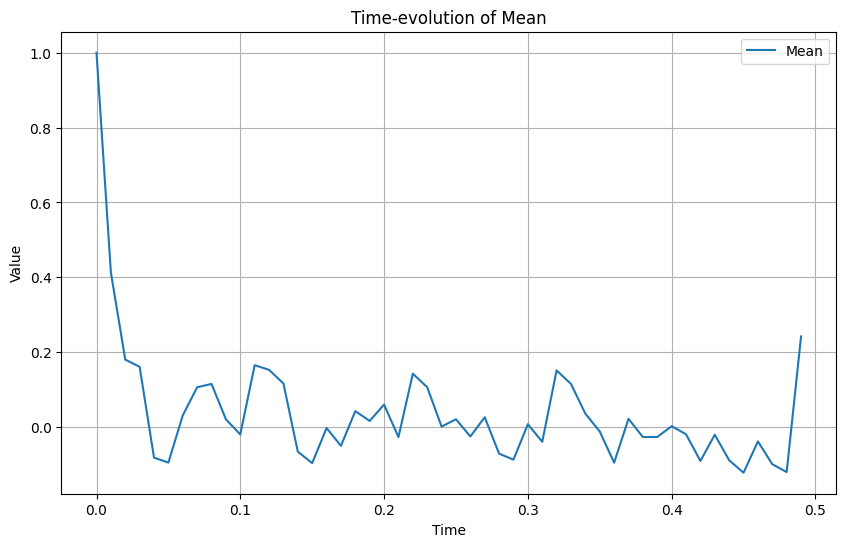

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(time, means, label='Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time-evolution of Mean')
plt.legend()
plt.grid(True)
plt.show()

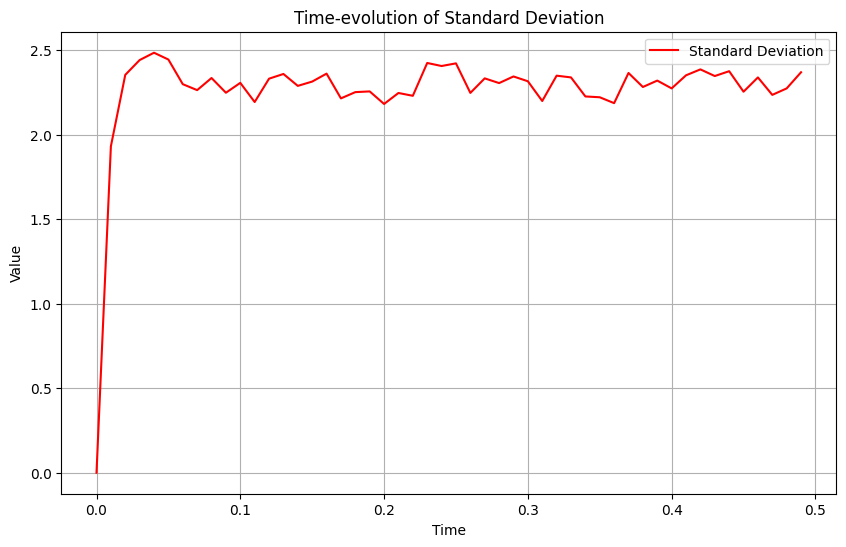

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(time, std_devs,'r', label='Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time-evolution of Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
print(np.mean(std_devs[1:]))

2.3020921758929758


the time-evolution of the mean with 500 independent realizations show me that the x tends to 0 as t becomes larger, and the time-evolution of the standard deviation is relatively stable, it's about 2.3

### Problem 4

In [29]:
observations = [100, 41, 15, 59, 85]
total_observations = 300

In [30]:
probabilities = np.array(observations) / total_observations

entropy = -np.sum(probabilities * np.log2(probabilities))
HHI = np.sum(probabilities ** 2)

In [31]:
max_entropy = np.log2(len(observations))
min_entropy = 0

In [32]:
max_HHI = 1
min_HHI = 1 / len(observations)

In [33]:
print("Shannon Entropy:", entropy)
print("Maximum Shannon Entropy:", max_entropy)
print("Minimum Shannon Entropy:", min_entropy)
print("Herfindahl-Hirschman Index:", HHI)
print("Maximum Herfindahl-Hirschman Index:", max_HHI)
print("Minimum Herfindahl-Hirschman Index:", min_HHI)

Shannon Entropy: 2.1137427585458974
Maximum Shannon Entropy: 2.321928094887362
Minimum Shannon Entropy: 0
Herfindahl-Hirschman Index: 0.25124444444444444
Maximum Herfindahl-Hirschman Index: 1
Minimum Herfindahl-Hirschman Index: 0.2


### Problem 5

In [34]:
P_0 = 0.0019
alpha_r=0.49
rank_0=211

In [35]:
f = np.zeros(1200)

for x in range(1,1201):
    f[x-1] = P_0*(np.e**(-x/rank_0))*(x**alpha_r)


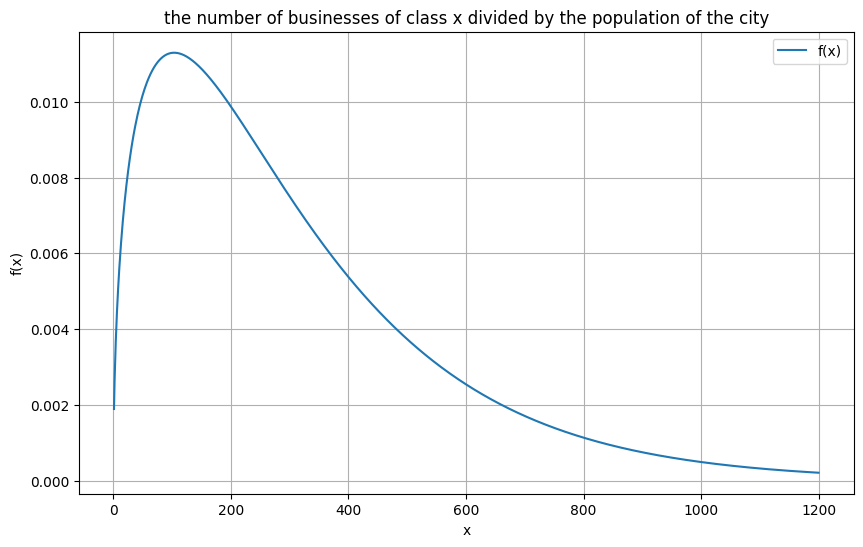

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,1201), f, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('the number of businesses of class x divided by the population of the city')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
if np.sum(f) != 1:
    print('For any positive integer value x, f(x) is not a probability mass function')

For any positive integer value x, f(x) is not a probability mass function


In [38]:
f_normalized = f / np.sum(f)

In [39]:
entropy = -np.sum(f_normalized * np.log2(f_normalized))

In [40]:
print("Shannon Entropy:", entropy)

Shannon Entropy: 9.601245924783095


### Problem 6

In [41]:
depression = data1[(data1['Data_Value_Type']=='Age-adjusted prevalence')&(data1['MeasureId']=='DEPRESSION')]

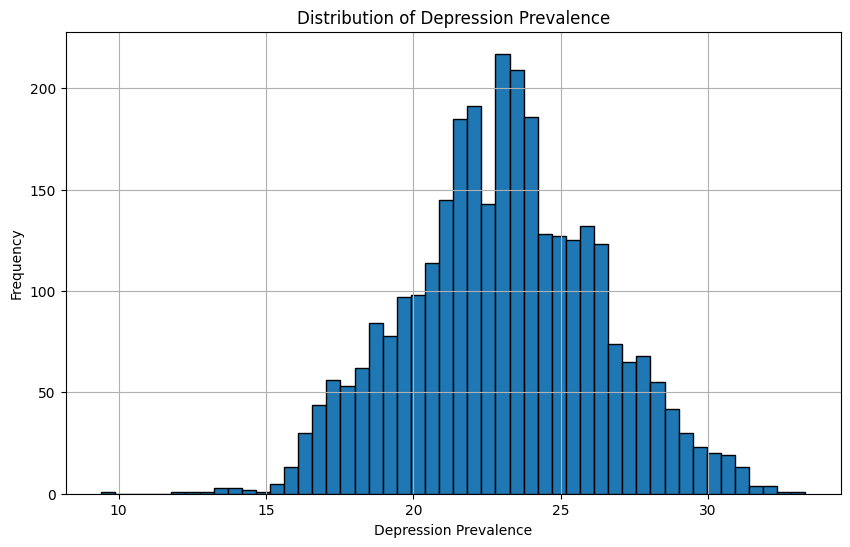

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(depression['Data_Value'], bins=50,edgecolor='black')
plt.xlabel('Depression Prevalence')
plt.ylabel('Frequency')
plt.title('Distribution of Depression Prevalence')
plt.grid(True)
plt.show()

In [43]:
md = (depression['Data_Value'] * depression['TotalPopulation']).sum() / depression['TotalPopulation'].sum()

In [44]:
TI = (depression['Data_Value'] / md * np.log(depression['Data_Value'] / md)).sum() / len(depression)

In [45]:
print("Theil Index of Inequality:", TI)

Theil Index of Inequality: 0.14586786275050512


### Problem 7

In [46]:
cdf = pd.read_csv('Coordinates_NY_county.csv')
udf = pd.read_excel('UnemploymentReport.xlsx')

In [47]:
cdf

,GEOID,NAME,LAT,LONG
0,36001,Albany County,42.588240,-73.974010
1,36003,Allegany County,42.247853,-78.026153
2,36005,Bronx County,40.848711,-73.852939
3,36007,Broome County,42.161977,-75.830283
4,36009,Cattaraugus County,42.239099,-78.662332
...,...,...,...,...
57,36115,Washington County,43.312377,-73.439428
58,36117,Wayne County,43.218114,-77.049402
59,36119,Westchester County,41.152686,-73.745753
60,36121,Wyoming County,42.701363,-78.228567


In [48]:
udf

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,Unemployment Rate (percent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,FIPS,Name,2013,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Median Household Income (2020),NaN,% of State Median HH Income
2,NaN,36000,New York,7.8,6.3,5.2,4.9,4.6,4.1,3.8,9.9,6.9,73354,NaN,1
3,NaN,36001,"Albany County, NY",6.2,4.9,4.4,4.1,4.2,3.7,3.5,6.9,4.4,70629,NaN,0.962851
4,NaN,36003,"Allegany County, NY",7.7,6.3,6.5,6.4,6.6,5.6,5.3,7.7,5.0,53371,NaN,0.727581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,NaN,36119,"Westchester County, NY",6.4,5.2,4.6,4.4,4.5,3.9,3.6,8.0,4.8,103340,NaN,1.408785
63,NaN,36121,"Wyoming County, NY",8.1,6.6,5.7,5.4,5.6,4.6,4.2,7.2,4.5,59612,NaN,0.812662
64,NaN,36123,"Yates County, NY",7,5.7,5.0,4.5,4.4,3.7,3.6,6.3,3.8,57057,NaN,0.777831
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
udf = udf.iloc[1:,1:]
udf.columns = udf.iloc[0]
udf

1,FIPS,Name,2013,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Median Household Income (2020),NaN,% of State Median HH Income
1,FIPS,Name,2013,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Median Household Income (2020),NaN,% of State Median HH Income
2,36000,New York,7.8,6.3,5.2,4.9,4.6,4.1,3.8,9.9,6.9,73354,NaN,1
3,36001,"Albany County, NY",6.2,4.9,4.4,4.1,4.2,3.7,3.5,6.9,4.4,70629,NaN,0.962851
4,36003,"Allegany County, NY",7.7,6.3,6.5,6.4,6.6,5.6,5.3,7.7,5.0,53371,NaN,0.727581
5,36005,"Bronx County, NY",11.7,9.5,7.6,7.1,6.2,5.6,5.2,16.2,13.6,44906,NaN,0.612182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,36119,"Westchester County, NY",6.4,5.2,4.6,4.4,4.5,3.9,3.6,8.0,4.8,103340,NaN,1.408785
63,36121,"Wyoming County, NY",8.1,6.6,5.7,5.4,5.6,4.6,4.2,7.2,4.5,59612,NaN,0.812662
64,36123,"Yates County, NY",7,5.7,5.0,4.5,4.4,3.7,3.6,6.3,3.8,57057,NaN,0.777831
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
udf = udf.iloc[1:64,[0,1,2,3,4,5,6,7,8,9,10,11,13]]
udf

1,FIPS,Name,2013,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Median Household Income (2020),% of State Median HH Income
2,36000,New York,7.8,6.3,5.2,4.9,4.6,4.1,3.8,9.9,6.9,73354,1
3,36001,"Albany County, NY",6.2,4.9,4.4,4.1,4.2,3.7,3.5,6.9,4.4,70629,0.962851
4,36003,"Allegany County, NY",7.7,6.3,6.5,6.4,6.6,5.6,5.3,7.7,5.0,53371,0.727581
5,36005,"Bronx County, NY",11.7,9.5,7.6,7.1,6.2,5.6,5.2,16.2,13.6,44906,0.612182
6,36007,"Broome County, NY",8,6.7,6.0,5.5,5.5,4.8,4.5,8.3,5.2,52510,0.715844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,36115,"Washington County, NY",7.7,6.1,5.1,4.7,4.6,4.1,3.9,6.9,4.6,60973,0.831216
61,36117,"Wayne County, NY",7.8,6.2,5.4,5.1,4.9,4.1,3.9,7.1,4.5,62329,0.849701
62,36119,"Westchester County, NY",6.4,5.2,4.6,4.4,4.5,3.9,3.6,8.0,4.8,103340,1.408785
63,36121,"Wyoming County, NY",8.1,6.6,5.7,5.4,5.6,4.6,4.2,7.2,4.5,59612,0.812662


In [51]:
udf['NAME'] = udf['Name'].str.replace(', NY', '', regex=False)
udf

1,FIPS,Name,2013,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Median Household Income (2020),% of State Median HH Income,NAME
2,36000,New York,7.8,6.3,5.2,4.9,4.6,4.1,3.8,9.9,6.9,73354,1,New York
3,36001,"Albany County, NY",6.2,4.9,4.4,4.1,4.2,3.7,3.5,6.9,4.4,70629,0.962851,Albany County
4,36003,"Allegany County, NY",7.7,6.3,6.5,6.4,6.6,5.6,5.3,7.7,5.0,53371,0.727581,Allegany County
5,36005,"Bronx County, NY",11.7,9.5,7.6,7.1,6.2,5.6,5.2,16.2,13.6,44906,0.612182,Bronx County
6,36007,"Broome County, NY",8,6.7,6.0,5.5,5.5,4.8,4.5,8.3,5.2,52510,0.715844,Broome County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,36115,"Washington County, NY",7.7,6.1,5.1,4.7,4.6,4.1,3.9,6.9,4.6,60973,0.831216,Washington County
61,36117,"Wayne County, NY",7.8,6.2,5.4,5.1,4.9,4.1,3.9,7.1,4.5,62329,0.849701,Wayne County
62,36119,"Westchester County, NY",6.4,5.2,4.6,4.4,4.5,3.9,3.6,8.0,4.8,103340,1.408785,Westchester County
63,36121,"Wyoming County, NY",8.1,6.6,5.7,5.4,5.6,4.6,4.2,7.2,4.5,59612,0.812662,Wyoming County


In [52]:
merged_df = pd.merge(cdf, udf, on='NAME')

In [53]:
merged_df

,GEOID,NAME,LAT,LONG,FIPS,Name,2013,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Median Household Income (2020),% of State Median HH Income
0,36001,Albany County,42.588240,-73.974010,36001,"Albany County, NY",6.2,4.9,4.4,4.1,4.2,3.7,3.5,6.9,4.4,70629,0.962851
1,36003,Allegany County,42.247853,-78.026153,36003,"Allegany County, NY",7.7,6.3,6.5,6.4,6.6,5.6,5.3,7.7,5.0,53371,0.727581
2,36005,Bronx County,40.848711,-73.852939,36005,"Bronx County, NY",11.7,9.5,7.6,7.1,6.2,5.6,5.2,16.2,13.6,44906,0.612182
3,36007,Broome County,42.161977,-75.830283,36007,"Broome County, NY",8,6.7,6.0,5.5,5.5,4.8,4.5,8.3,5.2,52510,0.715844
4,36009,Cattaraugus County,42.239099,-78.662332,36009,"Cattaraugus County, NY",8.7,7.1,6.3,6.1,6.2,5.3,4.9,9.1,5.3,51824,0.706492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36115,Washington County,43.312377,-73.439428,36115,"Washington County, NY",7.7,6.1,5.1,4.7,4.6,4.1,3.9,6.9,4.6,60973,0.831216
58,36117,Wayne County,43.218114,-77.049402,36117,"Wayne County, NY",7.8,6.2,5.4,5.1,4.9,4.1,3.9,7.1,4.5,62329,0.849701
59,36119,Westchester County,41.152686,-73.745753,36119,"Westchester County, NY",6.4,5.2,4.6,4.4,4.5,3.9,3.6,8.0,4.8,103340,1.408785
60,36121,Wyoming County,42.701363,-78.228567,36121,"Wyoming County, NY",8.1,6.6,5.7,5.4,5.6,4.6,4.2,7.2,4.5,59612,0.812662


In [54]:
def gini_coefficient(values):
    sorted_values = np.sort(values)
    
    cumulative_sum = np.cumsum(sorted_values)
    
    n = len(values)
    gini_index = (np.sum((2 * np.arange(1, n + 1) * sorted_values)) / (n * np.sum(sorted_values))) - (n + 1) / n
    
    return gini_index

In [55]:
AUR_GI = gini_coefficient(merged_df[2021.0])
MHHI_GI = gini_coefficient(merged_df['Median Household Income (2020)'])

In [56]:
print("Gini index for average unemployment rate in 2021:", AUR_GI)
print("Gini index for median house hold income:", MHHI_GI)

Gini index for average unemployment rate in 2021: 0.11951356727378615
Gini index for median house hold income: 0.11103833713212885


The Gini Index for average unemployment rate in 2021 is about 0.12 and The Gini Index for median house hold income is about 0.11, they both small. It illustrates that unemployment rates and median household incomes are relatively even across counties

### Problem 8

In [57]:
def morans_index(values, distances, alpha):
    n = len(values)
    w = np.exp(-alpha * distances)
    w_sum = np.sum(w)
    
    mean_value = np.mean(values)
    z = (values - mean_value) / np.std(values)
    
    numerator = np.sum(w * np.outer(z, z))
    denominator = np.sum(z**2)
    
    moran_index = (n / w_sum) * (numerator / denominator)
    
    return moran_index

In [58]:
from scipy.spatial import distance_matrix
distances = distance_matrix(merged_df.iloc[:,2:4],merged_df.iloc[:,2:4])
alpha = 0.01
AUR_moran_index = morans_index(merged_df[2021.0].values, distances, alpha)
MHHI_moran_index = morans_index(merged_df['Median Household Income (2020)'].values, distances, alpha)
print("Moran's index for average unemployment rate in 2021:", AUR_moran_index)
print("Moran's index for median household income:", MHHI_moran_index)

Moran's index for average unemployment rate in 2021: 0.0015433665369977958
Moran's index for median household income: 0.004123485025532337


Both of them are super small and tend to 0 with positive, they suggest that the two viarables' spatial clusterings and autocorrelations are relatively weak. And so that we can think the overall spatial structures of them are relatively random or evenly distributed.

### Problem 9

In [59]:
populations = np.array([1000, 7000, 5000, 10000, 3000])
coordinates = np.array([[0, 0], [0.8, 0.1], [0.1, 0.2], [0.4, 0.9], [0.4, 0.3]])

In [60]:
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

In [61]:
s_values = np.zeros((len(populations), len(populations)))
d = np.zeros((len(populations), len(populations)))
for i in range(len(populations)):
    for j in range(len(populations)):
        if i != j:
            d_ij = distance(coordinates[i], coordinates[j]) * 100
            d[i][j]=d_ij

In [62]:
for i in range(len(populations)):
    for j in range(len(populations)):
        for k in range(len(populations)):
            if i != j:
                if (d[i][k]<d[i][j]) & (i != k):
                    s_values[i][j] += populations[k]

In [63]:
print("s_ij values:")
print(s_values)

s_ij values:
[[    0.  8000.     0. 15000.  5000.]
 [ 8000.     0.  3000.  9000.     0.]
 [    0.  4000.     0. 11000.  1000.]
 [15000.  8000.  3000.     0.     0.]
 [12000.  5000.     0. 13000.     0.]]


### Problem 10

In [64]:
#1
pop = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        if i != j:
            pop[i, j] = populations[j] / d[i, j] 

p_matrix = np.zeros((5, 5))
for i in range(5):
    total = np.sum(pop[i, :])
    for j in range(5):
        if i != j:
            p_matrix[i, j] = pop[i, j] / total
print("Probability Transition Matrix (p_ij):")
print(p_matrix)

Probability Transition Matrix (p_ij):
[[0.         0.18396318 0.47377762 0.21513133 0.12712787]
 [0.04734158 0.         0.26988851 0.4267312  0.25603872]
 [0.12090413 0.26763271 0.         0.35498676 0.2564764 ]
 [0.04975503 0.38350929 0.32172058 0.         0.2450151 ]
 [0.03989585 0.31223439 0.31540437 0.33246539 0.        ]]


In [65]:
#2
prob_no_commute = (populations - np.sum(pop,axis=0)) / populations
print("\nProbabilities of not commuting outside of each city:")
print(prob_no_commute)


Probabilities of not commuting outside of each city:
[0.91272171 0.93991337 0.89638308 0.94886889 0.90934988]


In [66]:
#3 
T_matrix = p_matrix * populations * 1.1
fraction_commute_city_4 = np.sum(T_matrix[3]) / populations[3]
print("\nFraction of the population of city 4 that commutes outside for work:")
print(fraction_commute_city_4)


Fraction of the population of city 4 that commutes outside for work:
0.5585765099489906
